## Geo-Painting
This notebook is designed to explore the application of guided and controlled stable diffusion techniques to obtain geospatial data-focused results. To achieve this, we will utilize a pre-trained model named 'geospatial_diffuser,' which can be extracted from the repository. Additionally, we will incorporate an extra control layer using the controlnet technique.

As a result, Geo-Painting will require two inputs: a suitable prompt to describe the scenario (text to image) and a simple drawing, which will be used as a secondary filter (image to image). It's worth noting that, at the moment, this notebook is exclusively available for GPU, so it's crucial to configure the environment for a successful execution.

Wishing you a creative painting experience!

In [1]:
!pip install -q diffusers==0.14.0 transformers xformers git+https://github.com/huggingface/accelerate.git
!pip install -q opencv-contrib-python
!pip install -q controlnet_aux

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 84.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.6/211.6 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 100.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.4/202.4 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 43.7 MB/s eta 0:00:00


In [2]:
from diffusers import (
    StableDiffusionControlNetPipeline,
    UniPCMultistepScheduler,
    ControlNetModel
)
import torch

controlnet = ControlNetModel.from_pretrained("lllyasviel/control_v11f1p_sd15_depth", torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
     "geospatial_diffuser",
     safety_checker=None,
     low_cpu_mem_usage=False,
     device_map=None,
     controlnet=controlnet,
     torch_dtype=torch.float16
)
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()
pipe.enable_xformers_memory_efficient_attention()

The config attributes {'timestep_spacing': 'leading'} were passed to PNDMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.
/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
The config attributes {'addition_embed_type': None, 'addition_embed_type_num_heads': 64, 'addition_time_embed_dim': None, 'class_embeddings_concat': False, 'cross_attention_norm': None, 'encoder_hid_dim': None, 'encoder_hid_dim_type': None, 'mid_block_only_cross_attention': None, 'num_attention_heads': None, 'resnet_out_scale_factor': 1.0, 'resnet_skip_time_act': False, 'time_embedding_act_fn': None, 'time_embedding_dim': None, 'transformer_layers_per_block': 1} were passed to UNet2DConditionModel, but are not expected and will be ignored. Pleas

In [3]:
from diffusers.utils import load_image
image = load_image("painting_01.png")

  0%|          | 0/20 [00:00<?, ?it/s]

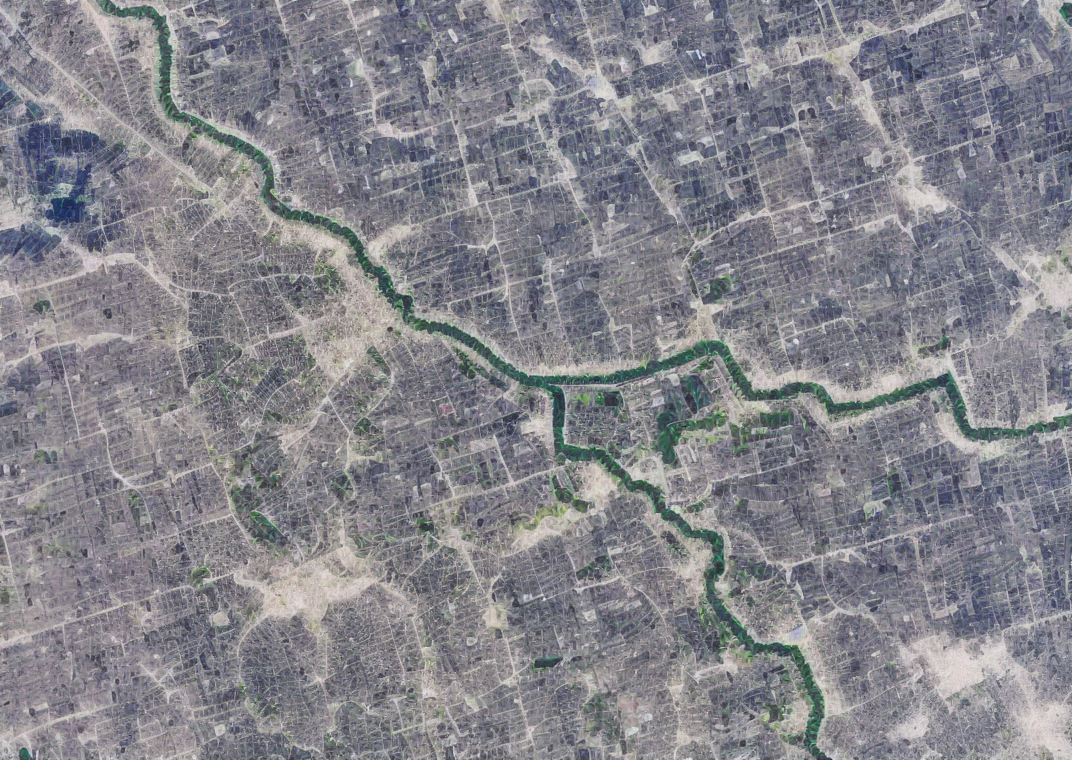

In [23]:
generator = torch.Generator(device="cuda").manual_seed(2)
prompt = "realistic satellite image of dense city"
output = pipe(
    prompt,
    image,
    negative_prompt="ugly, disfigured, low quality, blurry, nsfw",
    generator=generator,
    num_inference_steps=20,
)
output.images[0]